# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
# set up loading data
!rm -rf linearModels
! git clone https://github.com/quentinshin34/linearModels.git

Cloning into 'linearModels'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 55 (delta 12), reused 5 (delta 5), pack-reused 36 (from 1)
Receiving objects: 100% (55/55), 4.19 MiB | 13.94 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [11]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
# load data into data frame
data = "linearModels/lab/data/pierce_county_house_sales.csv"
df = pd.read_csv(data)
print(df.head())

    sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
0  2020-01-02      380000               2157                           0   
1  2020-01-02      383000               2238                           0   
2  2020-01-01      419900               1452                           0   
3  2020-01-02      251660                832                           0   
4  2020-01-02      500000               1780                           0   

   basement_square_feet  attached_garage_square_feet  \
0                     0                          528   
1                     0                          396   
2                     0                            0   
3                     0                            0   
4                   384                          484   

   detached_garage_square_feet  fireplaces        hvac_description  \
0                            0           0  Warm and Cool Air Zone   
1                            0           0              Forced Air

In [7]:
df['sale_date'] = pd.to_datetime(df['sale_date']) # ensure data is in correct format

# drop missing or mostly missing columns or missing info
df.drop(columns=['waterfront_type', 'view_quality'], inplace=True)
df.dropna(subset=['exterior', 'interior', 'roof_cover'], inplace=True)

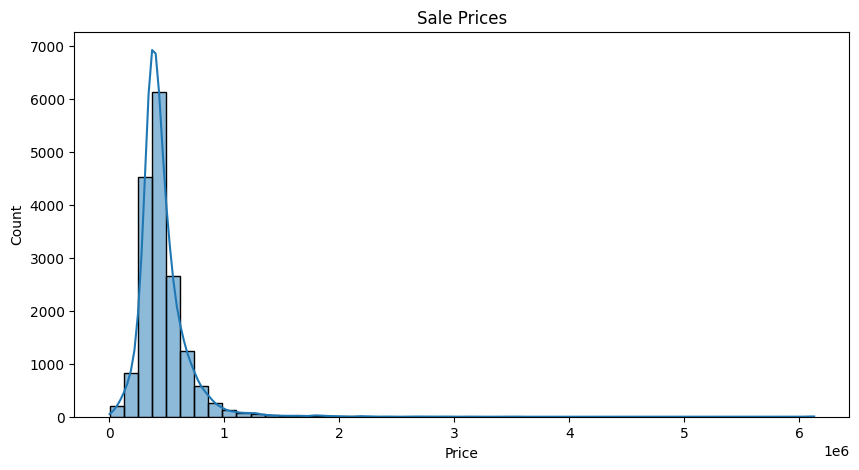

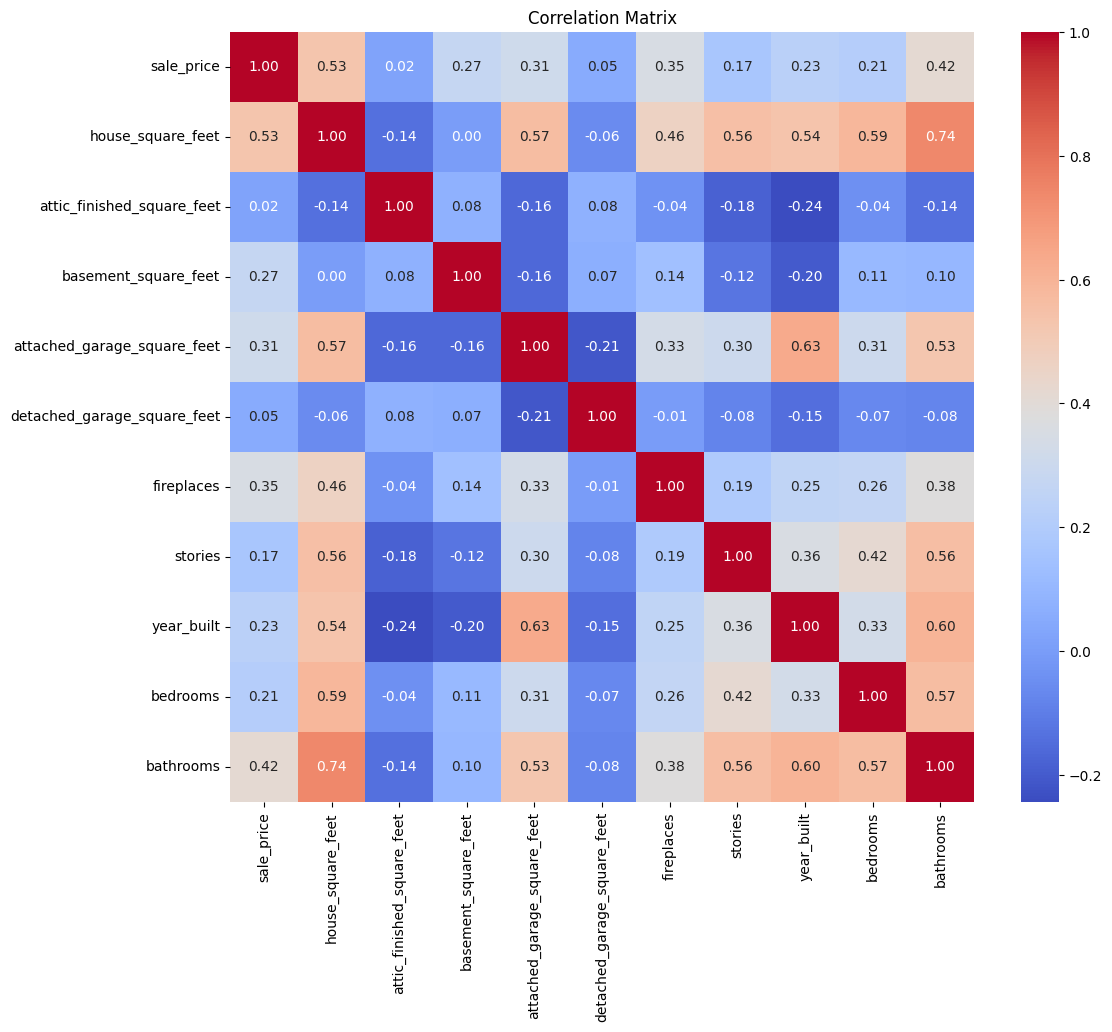

In [19]:
# bar chart for prices
plt.figure(figsize=(10, 5))
sns.histplot(df['sale_price'], bins=50, kde=True)
plt.title("Sale Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [17]:
# one-hot encode
df_encoded = pd.get_dummies(df.drop(columns='sale_date'), drop_first=True)

# MODEL A
# square feet & bathrooms
features_A = ['house_square_feet', 'bathrooms']
X_A = df_encoded[features_A]
y = df_encoded['sale_price']

# split
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y, test_size=0.2, random_state=42)

model_A = LinearRegression().fit(X_train_A, y_train_A)
y_train_pred_A = model_A.predict(X_train_A)
y_test_pred_A = model_A.predict(X_test_A)

rmse_train_A = np.sqrt(mean_squared_error(y_train_A, y_train_pred_A))
rmse_test_A = np.sqrt(mean_squared_error(y_test_A, y_test_pred_A))
r2_train_A = r2_score(y_train_A, y_train_pred_A)
r2_test_A = r2_score(y_test_A, y_test_pred_A)

# MODEL B
# square feet, bathrooms, bedrooms, year built
features_B = ['house_square_feet', 'bathrooms', 'bedrooms', 'year_built']
X_B = df_encoded[features_B] # encoded

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y, test_size=0.2, random_state=42)

# run linear regression for train and test
model_B = LinearRegression().fit(X_train_B, y_train_B)
y_train_pred_B = model_B.predict(X_train_B)
y_test_pred_B = model_B.predict(X_test_B)

# calculate rmse and r-squred values for train and test
rmse_train_B = np.sqrt(mean_squared_error(y_train_B, y_train_pred_B))
rmse_test_B = np.sqrt(mean_squared_error(y_test_B, y_test_pred_B))
r2_train_B = r2_score(y_train_B, y_train_pred_B)
r2_test_B = r2_score(y_test_B, y_test_pred_B)

# results
{
    "Model A (sqft + bathrooms)": {
        "Train RMSE": rmse_train_A,
        "Test RMSE": rmse_test_A,
        "Train R²": r2_train_A,
        "Test R²": r2_test_A
    },
    "Model B (+bedrooms, year_built)": {
        "Train RMSE": rmse_train_B,
        "Test RMSE": rmse_test_B,
        "Train R²": r2_train_B,
        "Test R²": r2_test_B
    }
}


{'Model A (sqft + bathrooms)': {'Train RMSE': np.float64(198791.13619978505),
  'Test RMSE': np.float64(195917.13689352717),
  'Train R²': 0.2810689328690197,
  'Test R²': 0.2940245274884502},
 'Model B (+bedrooms, year_built)': {'Train RMSE': np.float64(194979.05636729344),
  'Test RMSE': np.float64(192431.93392261525),
  'Train R²': 0.3083774453473158,
  'Test R²': 0.31891855171236216}}

Model B is better than Model A as it has a ~$3500 lower RMSE and a 0.025 greater R-squared on the test set. This shows that adding bedrooms and year built variables into the model helps explain the variance in price. The R-squared for both is still relatively low so there could be other models using different combinations of variables for more accurate prediction.

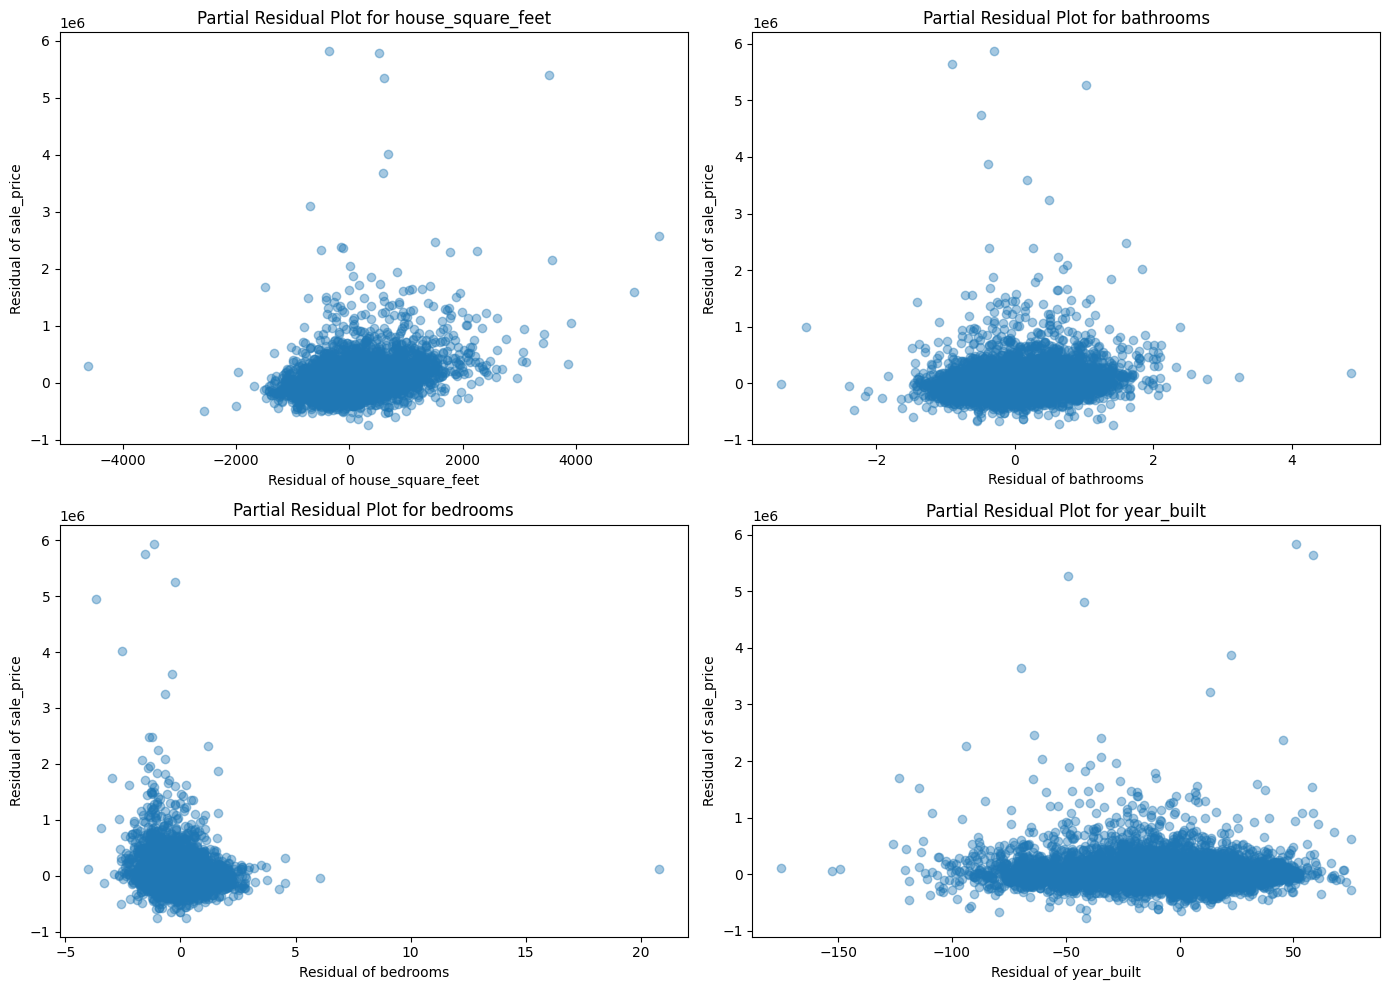

In [18]:
import statsmodels.api as sm

# variables to test
numeric_vars = ['house_square_feet', 'bathrooms', 'bedrooms', 'year_built']

# partial residuals plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# create plot for each variable
for i, var in enumerate(numeric_vars):
    # regress y on all predictors except current
    X_y = df_encoded[numeric_vars].drop(columns=var)
    X_y = sm.add_constant(X_y)
    y_resid = sm.OLS(df_encoded['sale_price'], X_y).fit().resid

    # regress current variables
    X_x = sm.add_constant(df_encoded[numeric_vars].drop(columns=var))
    x_resid = sm.OLS(df_encoded[var], X_x).fit().resid

    # plot residuals
    axes[i].scatter(x_resid, y_resid, alpha=0.4)
    axes[i].set_title(f"Partial Residual Plot for {var}")
    axes[i].set_xlabel(f"Residual of {var}")
    axes[i].set_ylabel("Residual of sale_price")

plt.tight_layout()
plt.show()

house square feet has a curved relationship and year built has a mild non linear pattern


In [14]:
# add new features
df_encoded['sqft_sq'] = df_encoded['house_square_feet'] ** 2
df_encoded['log_sqft'] = np.log1p(df_encoded['house_square_feet'])  # log(x + 1)
df_encoded['bath_per_bed'] = df_encoded['bathrooms'] / df_encoded['bedrooms'].replace(0, np.nan)

# inputs
X2 = df_encoded.drop(columns='sale_price').fillna(0)
y2 = df_encoded['sale_price']

# split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# for complex model
complex_model = LinearRegression()
complex_model.fit(X2_train, y2_train)

# prediction values for train and test
y2_train_pred = complex_model.predict(X2_train)
y2_test_pred = complex_model.predict(X2_test)

# calculate rmse and r-squared values
rmse_train_complex = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
rmse_test_complex = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
r2_train_complex = r2_score(y2_train, y2_train_pred)
r2_test_complex = r2_score(y2_test, y2_test_pred)

print("Complex Model:")
print("Train RMSE:", rmse_train_complex)
print("Test RMSE:", rmse_test_complex)
print("Train R²:", r2_train_complex)
print("Test R²:", r2_test_complex)


Complex Model:
Train RMSE: 175492.93245784796
Test RMSE: 170049.481695648
Train R²: 0.439710503126721
Test R²: 0.4681423785741414


The complex model has a lower RMSE by about $20,000 and a greater R-squared by about 0.15 compared the the test sets for both of the previous simpler models.

Complex models can sometimes have a tendency to overfit but this model did not and improved generalizatoin slightly. If a model is too restrictive or uses too many variables to address variance the model can over or under fit significantly. Regularization is definitely helpful but there is a sweet spot for not being too aggressive or too simple. There needs to be a balances to capture relationships but not overfit to noise.